In [55]:
import numpy as np
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

In [6]:
# загрузка набор данных Ирисы:
iris = datasets.load_iris()

In [19]:
iris_frame = pd.DataFrame(iris.data)
# обозначение колонок и целевых переменных
iris_frame.columns = iris.feature_names
iris_frame['target'] = iris.target
iris_frame['name'] = iris_frame.target.apply(lambda x : iris.target_names[x])
iris_frame['sepal square (cm**2)'] = iris_frame['sepal length (cm)'] * iris_frame['sepal width (cm)']  
iris_frame['petal square (cm**2)'] = iris_frame['petal length (cm)'] * iris_frame['petal width (cm)']  
iris_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name,sepal square (cm**2),petal square (cm**2)
0,5.1,3.5,1.4,0.2,0,setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,0,setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,0,setosa,15.04,0.26
3,4.6,3.1,1.5,0.2,0,setosa,14.26,0.30
4,5.0,3.6,1.4,0.2,0,setosa,18.00,0.28


In [24]:
iris_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
sepal length (cm)       150 non-null float64
sepal width (cm)        150 non-null float64
petal length (cm)       150 non-null float64
petal width (cm)        150 non-null float64
target                  150 non-null int32
name                    150 non-null object
sepal square (cm**2)    150 non-null float64
petal square (cm**2)    150 non-null float64
dtypes: float64(6), int32(1), object(1)
memory usage: 8.9+ KB


In [20]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [21]:
df_filter = iris_frame['target'].isin([0])
setosa_frame = iris_frame[df_filter]
setosa_frame.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,sepal square (cm**2),petal square (cm**2)
count,50.00000,50.000000,50.000000,50.000000,50.0,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000,0.0,17.257800,0.365600
std,0.35249,0.379064,0.173664,0.105386,0.0,2.933775,0.181155
min,4.30000,2.300000,1.000000,0.100000,0.0,10.350000,0.110000
25%,4.80000,3.200000,1.400000,0.200000,0.0,15.040000,0.280000
50%,5.00000,3.400000,1.500000,0.200000,0.0,17.170000,0.300000
75%,5.20000,3.675000,1.575000,0.300000,0.0,19.155000,0.420000
max,5.80000,4.400000,1.900000,0.600000,0.0,25.080000,0.960000


In [22]:
df_filter = iris_frame['target'].isin([1])
versicolor_frame = iris_frame[df_filter]
versicolor_frame.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,sepal square (cm**2),petal square (cm**2)
count,50.000000,50.000000,50.000000,50.000000,50.0,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000,1.0,16.526200,5.720400
std,0.516171,0.313798,0.469911,0.197753,0.0,2.866882,1.368403
min,4.900000,2.000000,3.000000,1.000000,1.0,10.000000,3.300000
25%,5.600000,2.525000,4.000000,1.200000,1.0,14.347500,4.860000
50%,5.900000,2.800000,4.350000,1.300000,1.0,16.385000,5.615000
75%,6.300000,3.000000,4.600000,1.500000,1.0,18.495000,6.750000
max,7.000000,3.400000,5.100000,1.800000,1.0,22.400000,8.640000


In [23]:
df_filter = iris_frame['target'].isin([2])
virginica_frame = iris_frame[df_filter]
virginica_frame.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,sepal square (cm**2),petal square (cm**2)
count,50.00000,50.000000,50.000000,50.00000,50.0,50.000000,50.000000
mean,6.58800,2.974000,5.552000,2.02600,2.0,19.684600,11.296200
std,0.63588,0.322497,0.551895,0.27465,0.0,3.458783,2.157412
min,4.90000,2.200000,4.500000,1.40000,2.0,12.250000,7.500000
25%,6.22500,2.800000,5.100000,1.80000,2.0,17.430000,9.717500
50%,6.50000,3.000000,5.550000,2.00000,2.0,20.060000,11.445000
75%,6.90000,3.175000,5.875000,2.30000,2.0,21.412500,12.790000
max,7.90000,3.800000,6.900000,2.50000,2.0,30.020000,15.870000


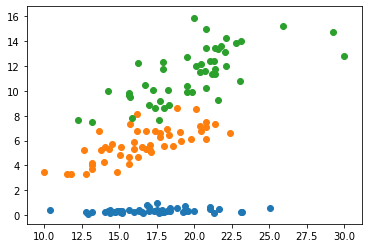

In [50]:
plt.scatter(setosa_frame['sepal square (cm**2)'], setosa_frame['petal square (cm**2)'])
plt.scatter(versicolor_frame['sepal square (cm**2)'], versicolor_frame['petal square (cm**2)'])
plt.scatter(virginica_frame['sepal square (cm**2)'], virginica_frame['petal square (cm**2)'])
plt.show()

In [52]:
X_train, X_valid, y_train, y_valid = train_test_split(
    iris_frame[['sepal square (cm**2)','petal square (cm**2)']], 
    iris_frame['target'], 
    test_size=0.25, 
    random_state=42)

scaler = RobustScaler()
cols_for_scaling = ['sepal square (cm**2)', 'petal square (cm**2)']

X_train[cols_for_scaling] = scaler.fit_transform(X_train[cols_for_scaling])
X_valid[cols_for_scaling] = scaler.transform(X_valid[cols_for_scaling])

In [53]:
X_train[cols_for_scaling].describe()

,sepal square (cm**2),petal square (cm**2)
count,1.120000e+02,112.000000
mean,1.220406e-02,0.028914
std,6.944266e-01,0.499471
min,-1.567984e+00,-0.591154
25%,-4.335557e-01,-0.557713
50%,-3.645678e-16,0.000000
75%,5.664443e-01,0.442287
max,2.384813e+00,1.042071


In [56]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)
accuracy_score(y_valid, y_pred)

1.0

In [57]:
check_test = pd.DataFrame({
    "y_valid": y_valid,
    "y_pred": y_pred,
})

check_test.head(10)

,y_valid,y_pred
73,1,1
18,0,0
118,2,2
78,1,1
76,1,1
31,0,0
64,1,1
141,2,2
68,1,1
82,1,1
